In [14]:
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt

In [ ]:
pip install tensorflow

In [30]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
from PIL import Image
import glob
x = []
y = []
for filename in glob.glob('/content/drive/MyDrive/Children vs Adults Classification/trainn/adults/*.jpg'):
    im= np.array(Image.open(filename).resize((64,64)))
    x.append(im)
    y.append(1)

for filename in glob.glob('/content/drive/MyDrive/Children vs Adults Classification/trainn/children/*.jpg'):
    im= np.array(Image.open(filename).resize((64,64)))
    x.append(im)
    y.append(0)

In [21]:
len(x),len(y)

(680, 680)

In [22]:
y.count(0)

340

In [23]:
x=(np.array(x).astype(int))/255
y=(np.array(y))

In [24]:
x.shape

(680, 64, 64, 3)

In [25]:
x

array([[[[0.55294118, 0.4745098 , 0.34509804],
         [0.54901961, 0.46666667, 0.32941176],
         [0.58431373, 0.50980392, 0.37647059],
         ...,
         [0.70196078, 0.50980392, 0.23137255],
         [0.69019608, 0.50196078, 0.21568627],
         [0.65882353, 0.4745098 , 0.21176471]],

        [[0.5254902 , 0.44313725, 0.30196078],
         [0.5254902 , 0.43529412, 0.28235294],
         [0.54901961, 0.4627451 , 0.30980392],
         ...,
         [0.69803922, 0.50980392, 0.22745098],
         [0.69803922, 0.50588235, 0.22352941],
         [0.66666667, 0.48235294, 0.21568627]],

        [[0.55294118, 0.47058824, 0.34117647],
         [0.56078431, 0.47843137, 0.3372549 ],
         [0.58039216, 0.49803922, 0.35294118],
         ...,
         [0.69019608, 0.50196078, 0.21568627],
         [0.69019608, 0.50196078, 0.21960784],
         [0.67058824, 0.48235294, 0.21176471]],

        ...,

        [[0.67058824, 0.61568627, 0.50980392],
         [0.67058824, 0.61568627, 0.50980392]

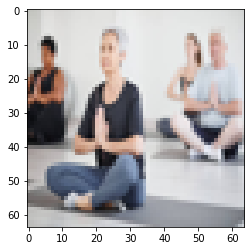

In [26]:
plt.imshow(x[186])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [31]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(64,64,3)),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(50, activation='relu'),
                             tf.keras.layers.Dense(20, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid'),])


model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer="adam",metrics=["accuracy"])
history=model.fit(x_train, y_train, batch_size=32, epochs=15, verbose=1, validation_data=(x_test,y_test))

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


17/17 [==============================] - 39s 2s/step - loss: 0.7044 - accuracy: 0.5074 - val_loss: 0.6867 - val_accuracy: 0.6176
Epoch 2/15
17/17 [==============================] - 28s 2s/step - loss: 0.6940 - accuracy: 0.5147 - val_loss: 0.6945 - val_accuracy: 0.3824
Epoch 3/15
17/17 [==============================] - 30s 2s/step - loss: 0.6925 - accuracy: 0.5294 - val_loss: 0.6979 - val_accuracy: 0.3824
Epoch 4/15
17/17 [==============================] - 28s 2s/step - loss: 0.6923 - accuracy: 0.5257 - val_loss: 0.6943 - val_accuracy: 0.3824
Epoch 5/15
17/17 [==============================] - 28s 2s/step - loss: 0.6922 - accuracy: 0.5221 - val_loss: 0.7018 - val_accuracy: 0.3824
Epoch 6/15
17/17 [==============================] - 28s 2s/step - loss: 0.6893 - accuracy: 0.5312 - val_loss: 0.6910 - val_accuracy: 0.4044
Epoch 7/15
17/17 [==============================] - 28s 2s/step - loss: 0.6810 - accuracy: 0.5735 - val_loss: 0.7289 - val_accuracy: 0.5221
Epoch 8/15
17/17 [=============

In [32]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 2s 334ms/step - loss: 0.8505 - accuracy: 0.5074
Accuracy: 50.74


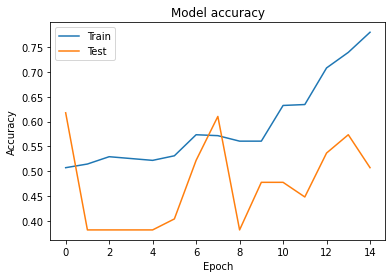

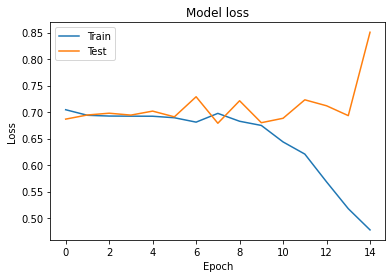

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()